# Screen Time vs. Real-Time Social Activities
Exploratory Analysis, Hypothesis Testing, and ML Modeling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_errort
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [2]:
# Load final dataset
df = pd.read_csv("final_dataset_with_weather.csv", parse_dates=["Date"])
df["Weather_Rain"] = df["WeatherConditions"].str.contains("Rain", case=False).astype(int)

## Exploratory Data Analysis (EDA)

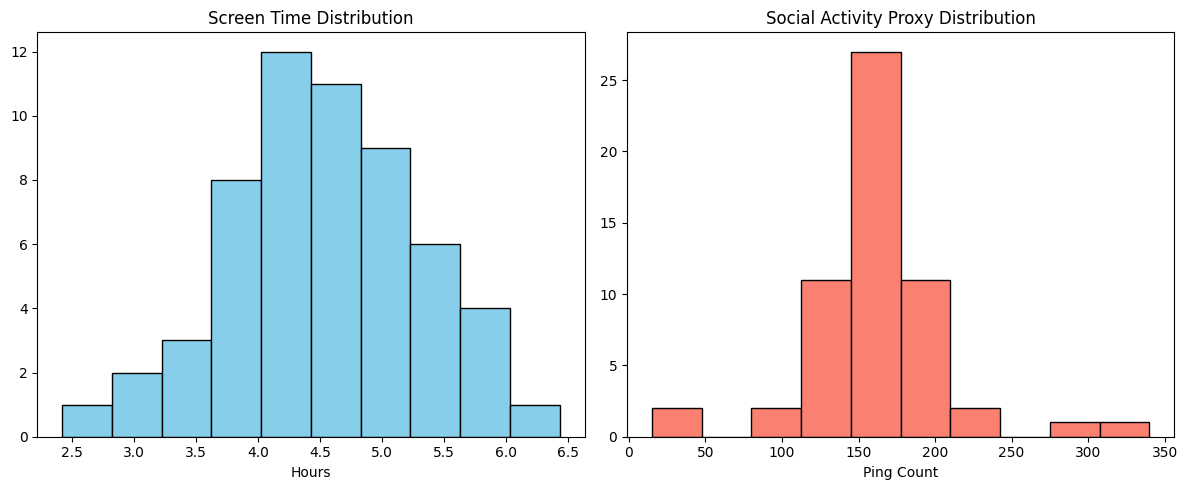

In [3]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df["ScreenTimeHours"], bins=10, color="skyblue", edgecolor="black")
plt.title("Screen Time Distribution")
plt.xlabel("Hours")

plt.subplot(1, 2, 2)
plt.hist(df["SocialProxy"], bins=10, color="salmon", edgecolor="black")
plt.title("Social Activity Proxy Distribution")
plt.xlabel("Ping Count")
plt.tight_layout()
plt.show()

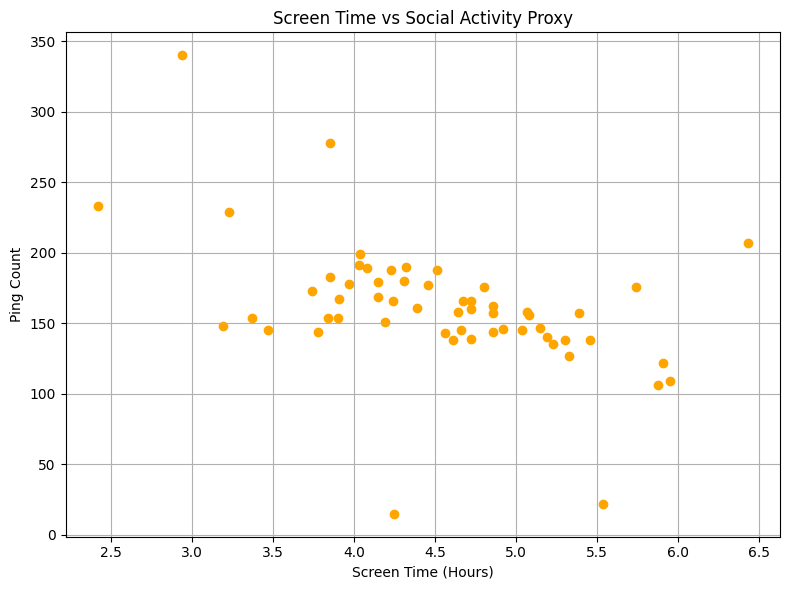

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(df["ScreenTimeHours"], df["SocialProxy"], alpha=1, color="orange")
plt.title("Screen Time vs Social Activity Proxy")
plt.xlabel("Screen Time (Hours)")
plt.ylabel("Ping Count")
plt.grid(True)
plt.tight_layout()
plt.show()


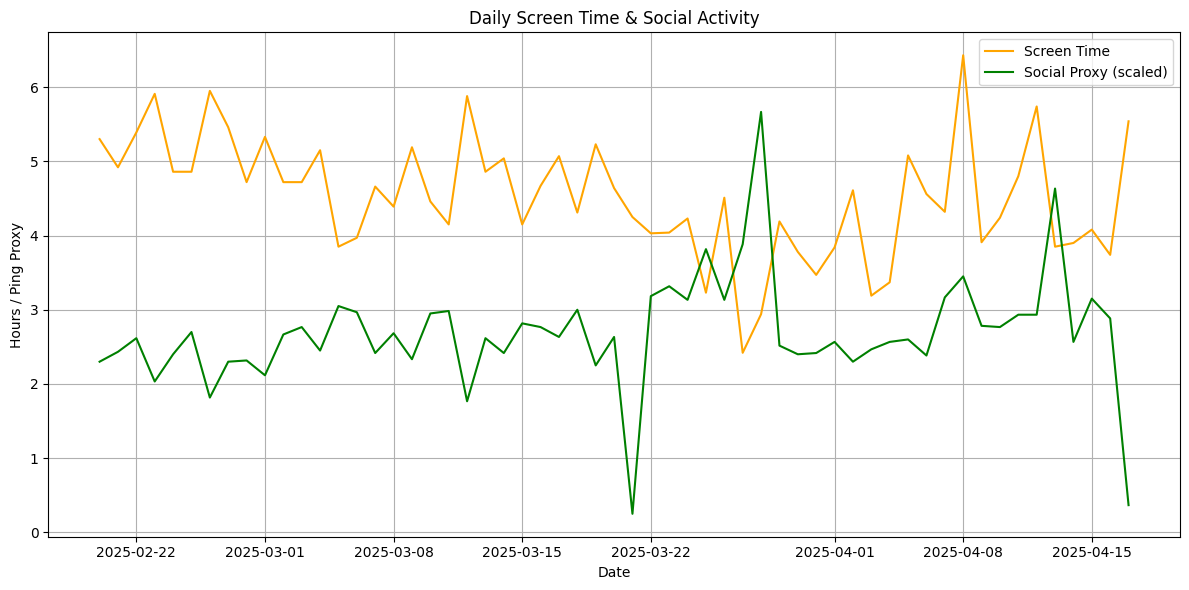

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["ScreenTimeHours"], label="Screen Time", color="orange")
plt.plot(df["Date"], df["SocialProxy"] / 60, label="Social Proxy (scaled)", color="green")
plt.legend()
plt.title("Daily Screen Time & Social Activity")
plt.xlabel("Date")
plt.ylabel("Hours / Ping Proxy")
plt.grid(True)
plt.tight_layout()
plt.show()


## Hypothesis Testing with Linear Regression

In [7]:
X = df[["ScreenTimeHours"]]
y = df["SocialProxy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = model.score(X_train, y_train)

print("Test MSE:", round(mse, 2))
print("Train R²:", round(r2, 2))


Test MSE: 1308.01
Train R²: 0.28


## ML Model with Screen Time + Weather

In [8]:
X_ml = df[["ScreenTimeHours", "Weather_Rain"]]
y_ml = df["SocialProxy"]

X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_ml, y_ml, test_size=0.2, random_state=42)

model_ml = LinearRegression()
model_ml.fit(X_train_ml, y_train_ml)

preds_ml = model_ml.predict(X_test_ml)
mse_ml = mean_squared_error(y_test_ml, preds_ml)
r2_ml = model_ml.score(X_train_ml, y_train_ml)

print("ML Model with Weather - Test MSE:", round(mse_ml, 2))
print("ML Model with Weather - Train R²:", round(r2_ml, 2))

ML Model with Weather - Test MSE: 1279.82
ML Model with Weather - Train R²: 0.29


##  Random Forest Regressor: Modeling Social Activity

R²: -0.1403512483590832
MSE: 836.5109935185186
MAE: 16.438055555555554


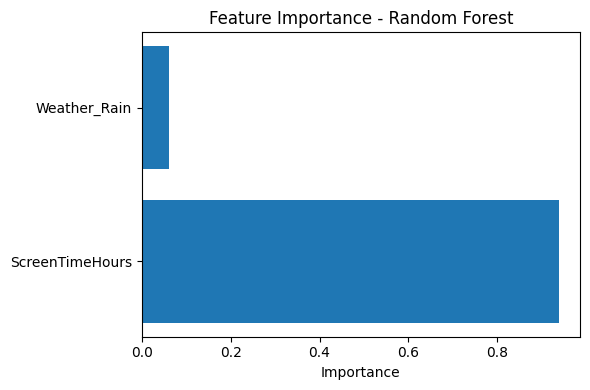

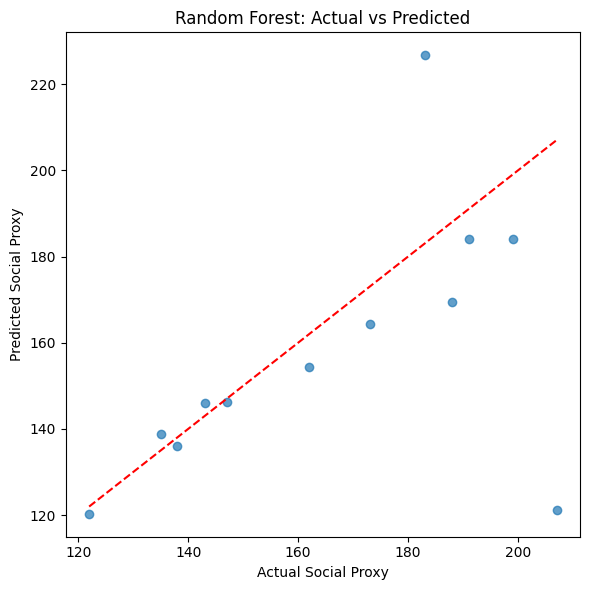

In [11]:

# Weather_Rain column
df['Weather_Rain'] = df['WeatherConditions'].str.contains("Rain").astype(int)

# Feature and target
X = df[['ScreenTimeHours', 'Weather_Rain']]
y = df['SocialProxy']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Print outcome
print("R²:", r2_score(y_test, rf_preds))
print("MSE:", mean_squared_error(y_test, rf_preds))
print("MAE:", mean_absolute_error(y_test, rf_preds))

# Importance graph
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()

# Predict. vs Real graph
plt.figure(figsize=(6, 6))
plt.scatter(y_test, rf_preds, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Social Proxy")
plt.ylabel("Predicted Social Proxy")
plt.title("Random Forest: Actual vs Predicted")
plt.tight_layout()
plt.savefig("predicted_vs_actual.png")
plt.show()
